<a href="https://colab.research.google.com/github/jnpatel1/stock-pitch/blob/main/sofi.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

/tmp/ipython-input-1543886986.py:25: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(ticker, period='3y', interval='1d', progress=False)
/tmp/ipython-input-1543886986.py:25: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(ticker, period='3y', interval='1d', progress=False)
/tmp/ipython-input-1543886986.py:25: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(ticker, period='3y', interval='1d', progress=False)
/tmp/ipython-input-1543886986.py:25: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(ticker, period='3y', interval='1d', progress=False)
/tmp/ipython-input-1543886986.py:25: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(ticker, period='3y', interval='1d', progress=False)
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['SQ']: YF

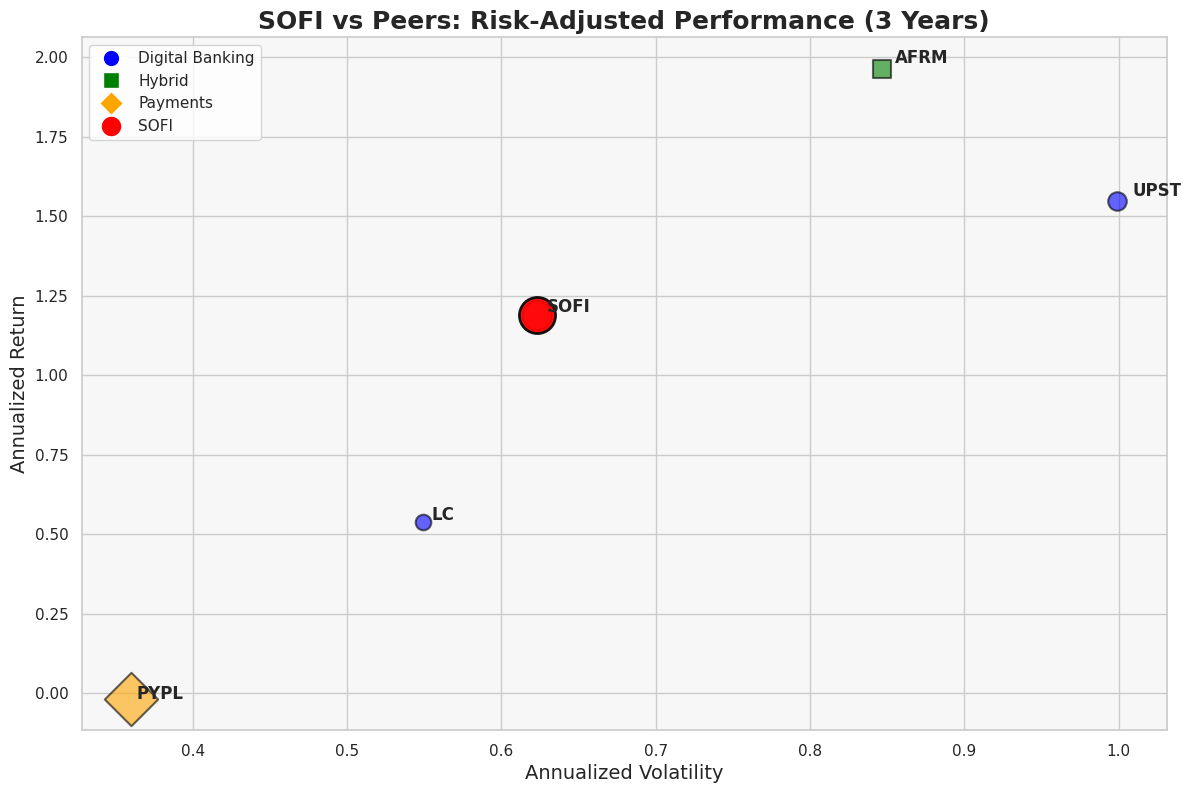

,Annualized Return,Annualized Volatility,Sortino Ratio,Omega Ratio,Max Drawdown,Market Cap
SOFI,1.187414,0.623129,1.966855,1.239481,-0.473100,31.64
UPST,1.548051,0.998923,1.576971,1.191963,-0.710501,5.00
LC,0.539739,0.549186,1.217126,1.151868,-0.538674,2.50
AFRM,1.963057,0.846586,2.288080,1.254920,-0.573794,4.00
SQ,NaN,NaN,NaN,NaN,NaN,55.00
PYPL,-0.017393,0.359942,-0.061455,0.991479,-0.420538,85.00


In [ ]:
import pandas as pd
import numpy as np
import yfinance as yf
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style='whitegrid')

# -----------------------------
# Peer Set (HOOD removed)
# -----------------------------
tickers = ['SOFI', 'UPST', 'LC', 'AFRM', 'SQ', 'PYPL']
market_caps = {'SOFI': 31.64, 'UPST': 5.0, 'LC': 2.5, 'AFRM': 4.0, 'SQ': 55.0, 'PYPL': 85.0}

# Define colors by business type
colors = {'SOFI': 'red', 'UPST': 'blue', 'LC': 'blue', 'AFRM': 'green', 'SQ': 'orange', 'PYPL': 'orange'}
# Define marker shapes
markers = {'SOFI': 'o', 'UPST': 'o', 'LC': 'o', 'AFRM': 's', 'SQ': 'D', 'PYPL': 'D'}

# -----------------------------
# Download data safely
# -----------------------------
prices = pd.DataFrame()
for ticker in tickers:
    data = yf.download(ticker, period='3y', interval='1d', progress=False)
    if 'Adj Close' in data.columns:
        prices[ticker] = data['Adj Close'].dropna()
    else:
        prices[ticker] = data.iloc[:,0].dropna()

# -----------------------------
# Daily returns
# -----------------------------
returns = prices.pct_change().dropna(how='all')

# -----------------------------
# Metrics functions
# -----------------------------
def ann_return(r):
    return (1 + r.mean())**252 - 1

def ann_vol(r):
    return r.std() * np.sqrt(252)

def sortino(r, target=0):
    r = r.dropna()
    downside = r[r < target]
    return (r.mean()*252) / (np.std(downside)*np.sqrt(252)) if len(downside)>0 else np.nan

def omega(r, threshold=0):
    r = r.dropna()
    gains = r[r > threshold].sum()
    losses = abs(r[r < threshold].sum())
    return gains / losses if losses != 0 else np.nan

def max_drawdown(series):
    series = series.dropna()
    cum_max = series.cummax()
    return ((series - cum_max)/cum_max).min()

# -----------------------------
# Calculate metrics
# -----------------------------
metrics = pd.DataFrame(index=tickers)
for ticker in tickers:
    if ticker in returns:
        metrics.loc[ticker, 'Annualized Return'] = ann_return(returns[ticker])
        metrics.loc[ticker, 'Annualized Volatility'] = ann_vol(returns[ticker])
        metrics.loc[ticker, 'Sortino Ratio'] = sortino(returns[ticker])
        metrics.loc[ticker, 'Omega Ratio'] = omega(returns[ticker])
        metrics.loc[ticker, 'Max Drawdown'] = max_drawdown(prices[ticker])
        metrics.loc[ticker, 'Market Cap'] = market_caps[ticker]
    else:
        print(f"No data for {ticker}")

# -----------------------------
# Plot bubble chart
# -----------------------------
plt.figure(figsize=(14,9))
ax = plt.gca()

for ticker in tickers:
    plt.scatter(
        metrics.loc[ticker, 'Annualized Volatility'],
        metrics.loc[ticker, 'Annualized Return'],
        s=np.sqrt(metrics.loc[ticker, 'Market Cap'])*80,  # scaled for aesthetics
        color=colors[ticker],
        marker=markers[ticker],
        alpha=0.6,
        edgecolor='black',
        linewidth=1.5
    )
    plt.text(
        metrics.loc[ticker, 'Annualized Volatility']*1.01,
        metrics.loc[ticker, 'Annualized Return']*1.01,
        ticker,
        fontsize=12,
        weight='bold'
    )

# Highlight SOFI
plt.scatter(
    metrics.loc['SOFI', 'Annualized Volatility'],
    metrics.loc['SOFI', 'Annualized Return'],
    s=np.sqrt(metrics.loc['SOFI', 'Market Cap'])*120,
    color='red',
    marker='o',
    edgecolor='black',
    linewidth=2,
    alpha=0.9,
    label='SOFI'
)

# Grid, labels, title
ax.set_facecolor('#f7f7f7')
plt.xlabel('Annualized Volatility', fontsize=14)
plt.ylabel('Annualized Return', fontsize=14)
plt.title('SOFI vs Peers: Risk-Adjusted Performance (3 Years)', fontsize=18, weight='bold')

# Custom legend for business type
from matplotlib.lines import Line2D
legend_elements = [
    Line2D([0], [0], marker='o', color='w', label='Digital Banking', markerfacecolor='blue', markersize=12),
    Line2D([0], [0], marker='s', color='w', label='Hybrid', markerfacecolor='green', markersize=12),
    Line2D([0], [0], marker='D', color='w', label='Payments', markerfacecolor='orange', markersize=12),
    Line2D([0], [0], marker='o', color='w', label='SOFI', markerfacecolor='red', markersize=15)
]
plt.legend(handles=legend_elements, loc='upper left')

plt.show()

metrics


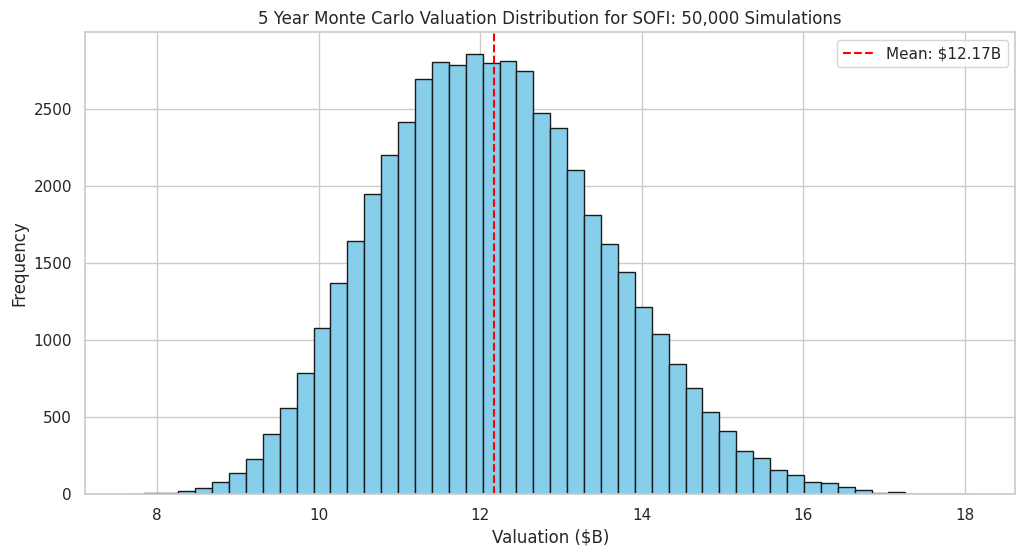

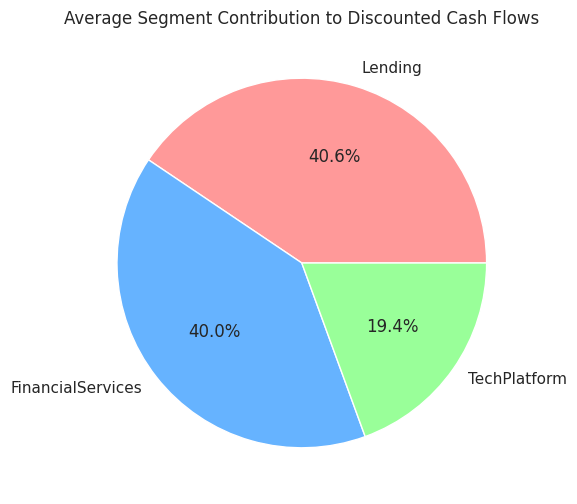

Mean Valuation: $12.17B
95% Confidence Interval: $9.65B - $15.07B
Probability SOFI is undervalued at $26.24: 0.00%


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# -----------------------------
# Input Parameters
# -----------------------------
current_price = 26.24
shares_outstanding = 1.107e9
revenue_2024 = 2.6e9  # total revenue
margin_2024 = 0.15
years = 5
simulations = 50000

# Segment revenue split (approx)
segment_split = {'Lending': 0.55, 'FinancialServices': 0.35, 'TechPlatform': 0.10}

# Segment growth assumptions (triangular: low, mode, high)
segment_growth_params = {
    'Lending': (0.08, 0.12, 0.18),
    'FinancialServices': (0.12, 0.18, 0.25),
    'TechPlatform': (0.20, 0.28, 0.35)
}

# Segment margin assumptions (initial range low, mode, high)
segment_margin_params = {
    'Lending': (0.20, 0.225, 0.25),
    'FinancialServices': (0.25, 0.30, 0.35),
    'TechPlatform': (0.30, 0.40, 0.50)
}

# Discount rate and terminal multiple
discount_rate_params = (0.10, 0.12, 0.14)
terminal_ev_ebitda_params = (12, 14, 18)
terminal_ev_revenue_params = (2.0, 2.75, 3.5)

# -----------------------------
# Monte Carlo Simulation
# -----------------------------
valuations = []
segment_contributions = {seg: [] for seg in segment_split.keys()}

for _ in range(simulations):
    # Draw discount rate
    discount_rate = np.random.triangular(*discount_rate_params)

    total_cash_flows = []
    seg_cash_flows = {seg: 0 for seg in segment_split.keys()}

    # Initialize segment revenues and margins
    seg_revenue = {seg: revenue_2024 * split for seg, split in segment_split.items()}
    seg_margin = {seg: np.random.triangular(*segment_margin_params[seg]) for seg in segment_split.keys()}

    # Draw growth rates per segment
    seg_growth = {seg: np.random.triangular(*segment_growth_params[seg]) for seg in segment_split.keys()}

    for year in range(1, years+1):
        yearly_cf = 0
        for seg in segment_split.keys():
            # Update revenue
            seg_revenue[seg] *= 1 + seg_growth[seg]
            # Adjust margin slightly with random noise (simulate dynamic margin)
            seg_margin[seg] += np.random.normal(0, 0.005)
            seg_margin[seg] = min(max(seg_margin[seg], 0), 1)  # clamp between 0 and 1
            # Cash flow for segment
            cf = seg_revenue[seg] * seg_margin[seg]
            # Discounted CF
            cf_discounted = cf / ((1 + discount_rate) ** year)
            yearly_cf += cf_discounted
            seg_cash_flows[seg] += cf_discounted
        total_cash_flows.append(yearly_cf)

    # Terminal value: choose randomly between EV/EBITDA or EV/Revenue
    if np.random.rand() > 0.5:
        # EV/EBITDA method (use last year CF as proxy for EBITDA)
        multiple = np.random.triangular(*terminal_ev_ebitda_params)
        terminal_value = total_cash_flows[-1] * multiple
    else:
        # EV/Revenue method
        total_revenue_last_year = sum(seg_revenue.values())
        multiple = np.random.triangular(*terminal_ev_revenue_params)
        terminal_value = total_revenue_last_year * multiple

    # Discount terminal value
    terminal_value /= (1 + discount_rate) ** years

    # Total valuation
    total_valuation = sum(total_cash_flows) + terminal_value
    valuations.append(total_valuation)

    # Segment contribution as % of valuation
    for seg in segment_split.keys():
        segment_contributions[seg].append(seg_cash_flows[seg] / total_valuation)

# Convert to numpy arrays
valuations = np.array(valuations)
segment_contributions = {seg: np.array(vals) for seg, vals in segment_contributions.items()}

# -----------------------------
# Analysis and Outputs
# -----------------------------
valuation_hist = valuations / 1e9  # in billions

mean_val = np.mean(valuation_hist)
conf_int = np.percentile(valuation_hist, [2.5, 97.5])
prob_undervalued = np.mean((valuations / shares_outstanding) > current_price)

# Plot histogram
plt.figure(figsize=(12,6))
plt.hist(valuation_hist, bins=50, color='skyblue', edgecolor='k')
plt.axvline(mean_val, color='red', linestyle='--', label=f'Mean: ${mean_val:.2f}B')
plt.title('5 Year Monte Carlo Valuation Distribution for SOFI: 50,000 Simulations')
plt.xlabel('Valuation ($B)')
plt.ylabel('Frequency')
plt.legend()
plt.show()

# Plot segment contributions (average across simulations)
avg_segment_pct = {seg: np.mean(vals) for seg, vals in segment_contributions.items()}
plt.figure(figsize=(8,6))
plt.pie(list(avg_segment_pct.values()), labels=avg_segment_pct.keys(), autopct='%1.1f%%', colors=['#ff9999','#66b3ff','#99ff99'])
plt.title('Average Segment Contribution to Discounted Cash Flows')
plt.show()

# Print results
print(f"Mean Valuation: ${mean_val:.2f}B")
print(f"95% Confidence Interval: ${conf_int[0]:.2f}B - ${conf_int[1]:.2f}B")
print(f"Probability SOFI is undervalued at ${current_price}: {prob_undervalued*100:.2f}%")


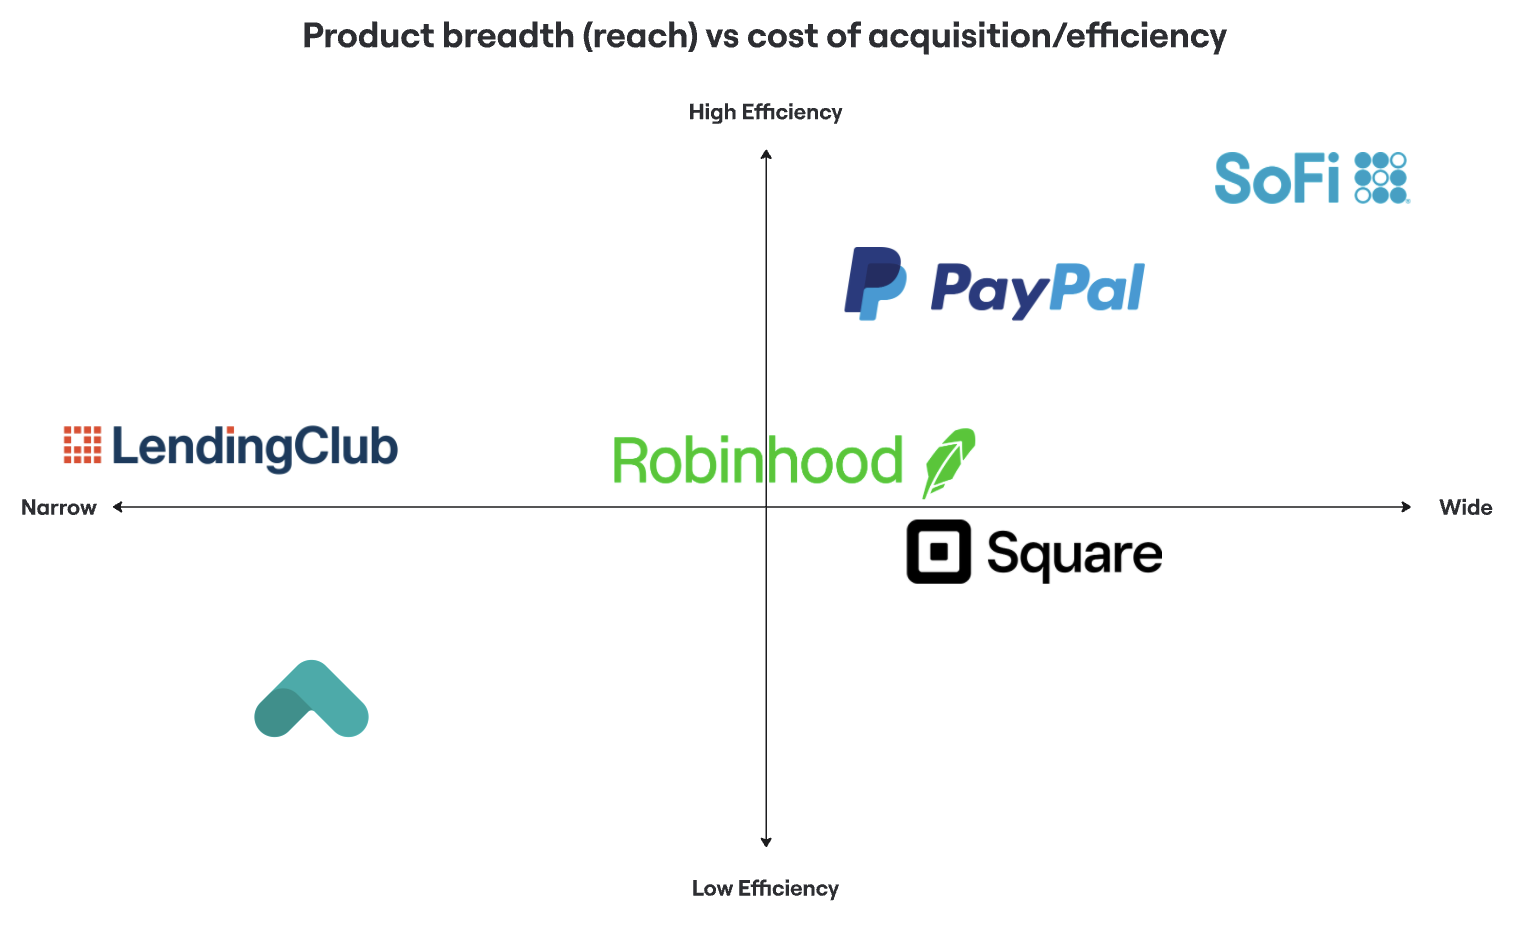